# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [1]:
#import tensorflow and keras
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

In [2]:
%pip install -q opendatasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import opendatasets as od

# od.download('https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset')
od.download("https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog


100%|██████████| 218M/218M [03:15<00:00, 1.17MB/s] 


In [15]:
import keras
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "C:\\Users\\abdau\\OneDrive\\Desktop\\Exercise\cat-and-dog\\training_set\\training_set",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\abdau\AppData\Local\Temp\ipykernel_15176\522739428.py:6: SyntaxWarning: invalid escape sequence '\c'
  "C:\\Users\\abdau\\OneDrive\\Desktop\\Exercise\cat-and-dog\\training_set\\training_set",


Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Using 1601 files for validation.


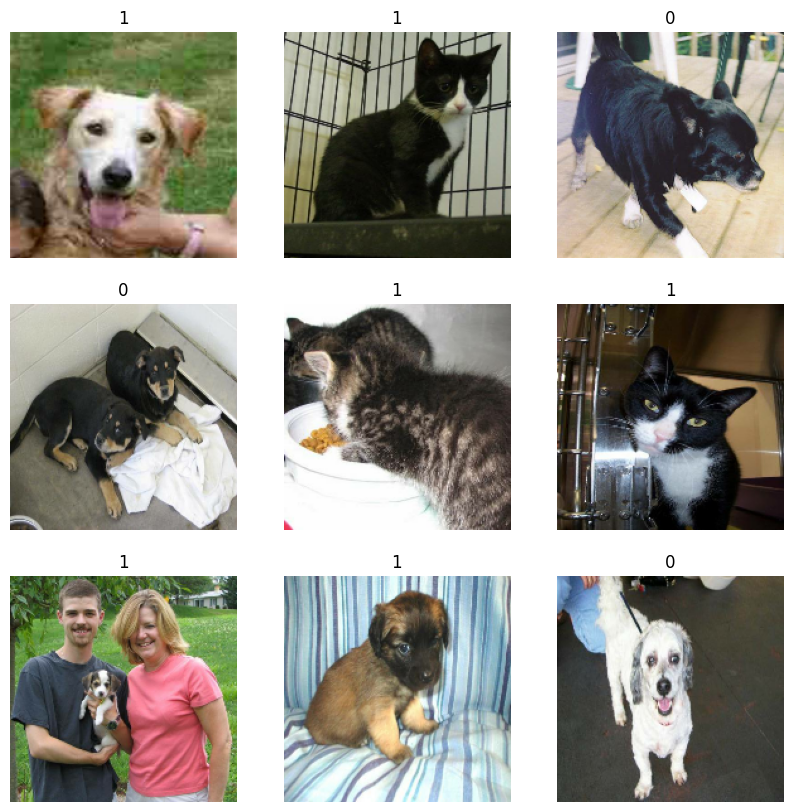

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [17]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.2, 0.2),

]

def data_augmentation(images):
    rand = np.random.randint(0, len(data_augmentation_layers))
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

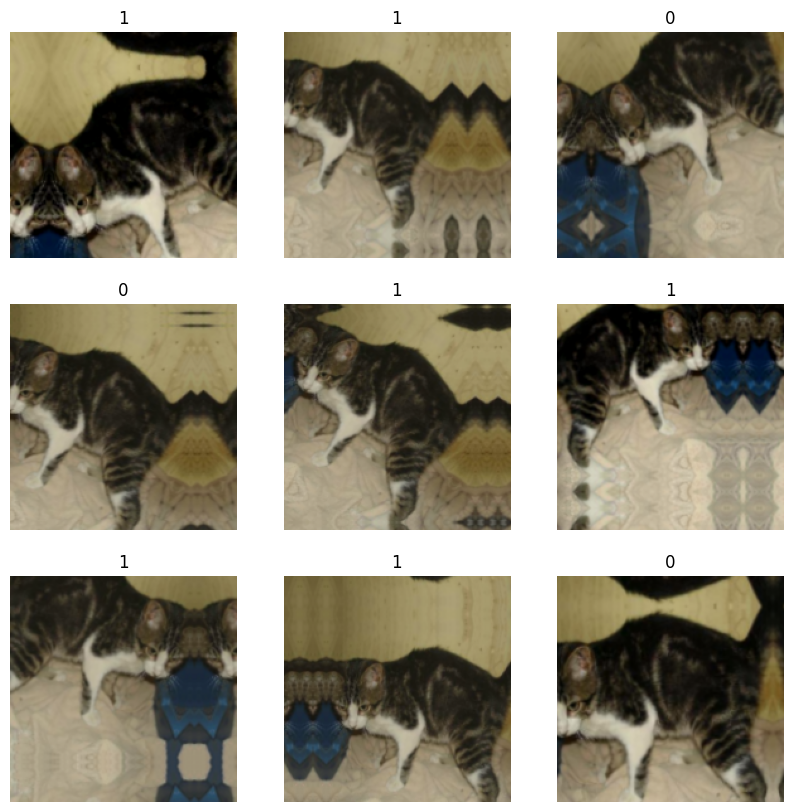

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [20]:
import tensorflow as tf
import keras
from keras import models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

In [21]:
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Rescaling(1./255),

    # Conv Block
     layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(2,2),

    # Conv Block
     layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(2,2),


    # Output
    layers.Flatten(),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 129600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │     2,073,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,139,329 (8.16 MB)

 Trainable params: 2,139,329 (8.16 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [23]:
model.fit(train_ds, batch_size=batch_size, epochs=10, validation_data=val_ds)
# model.fit(X_train, y_train, batch_size=2000, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5216 - loss: 0.7138 - val_accuracy: 0.5022 - val_loss: 0.6932
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.4873 - loss: 0.6933 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.4872 - loss: 0.6932 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.4912 - loss: 0.6932 - val_accuracy: 0.4978 - val_loss: 0.6931
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.4944 - loss: 0.6932 - val_accuracy: 0.4978 - val_loss: 0.6932
Epoch 6/10
46/51 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4899 - loss: 0.6932 

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [ ]:
model.evaluate(val_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.7244 - loss: 0.5765


[0.5798489451408386, 0.7251717448234558]

## Step 8: Save the Model
Finally, save your trained model for future use.

In [ ]:
model.save("model.keras")